# Import Libraries

In [69]:
import pandas as pd
import os
import json
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Baseline Models

## Load data

In [70]:
# Generate file_path
main_dir = os.path.dirname(os.getcwd())
file_path_encoded = os.path.join(main_dir, 'data', 'processed', 'train_dataset_processed_encoded.csv')

# Read the csv based on the file_path
train_dataset_processed_encoded = pd.read_csv(file_path_encoded)

In [71]:
# Open the all_features JSON to extract the all_features list
main_dir = os.path.dirname(os.getcwd())
processed_path = os.path.join(main_dir, 'data', 'processed', 'all_features.json')
with open(processed_path, 'r') as f:
    all_features = json.load(f)

# Store the features into X and the target into y
X = train_dataset_processed_encoded[all_features]
y = train_dataset_processed_encoded['Survived']

# Store X with log-transformed numerical features
X_log = train_dataset_processed_encoded[all_features].drop("Fare", axis = 1)
X_log['Fare_log'] = train_dataset_processed_encoded['Fare_log'].copy()

# Store X with standard scaled numerical features
X_standard_scaled = train_dataset_processed_encoded[all_features].drop("Fare", axis = 1)
X_standard_scaled['Fare_StandardScaled'] = train_dataset_processed_encoded['Fare_StandardScaled'].copy()

# Store X with min_max scaled numerical features
X_min_max_scaled = train_dataset_processed_encoded[all_features].drop("Fare", axis = 1)
X_min_max_scaled['Fare_MinMaxScaled'] = train_dataset_processed_encoded['Fare_MinMaxScaled'].copy()

## Train/Test split

In [72]:
# Split the data into Train and Test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

# Split the data for log-transformed features
X_train_log, X_val_log, y_train_log, y_val_log = train_test_split(X_log, y, test_size = 0.2, random_state = 15, stratify = y)

# Split the data for Standard Scaled features
X_train_standard_scaled, X_val_standard_scaled, y_train_standard_scaled, y_val_standard_scaled = train_test_split(
    X_standard_scaled, y, test_size = 0.2, random_state = 15, stratify = y
)

# Split the data for MinMax Scale features
X_train_min_max_scaled, X_val_min_max_scaled, y_train_min_max_scaled, y_val_min_max_scaled = train_test_split(
    X_min_max_scaled, y, test_size = 0.2, random_state = 15, stratify = y
)


## Train and Predict

In [73]:
def model_train_predict(model, 
                        random_state, 
                        X_train, 
                        y_train, 
                        X_val,
                        y_val,
                        model_path_name, 
                        results_path_name):
    # Initialize the model
    model = model(random_state = random_state)

    # Train the model
    model.fit(X_train, y_train)

    # Export the model
    model_path = os.path.join(main_dir, 'models', 'Baseline', model_path_name)
    joblib.dump(model, model_path)

    # Predict y_val
    y_pred = model.predict(X_val)

    # Build the DataFrame
    df_val = pd.DataFrame({
        'y_val': y_val,
        'y_pred': y_pred
    })

    # Export the results csv
    results_path = os.path.join(main_dir, 'data', 'processed', 'Baseline', results_path_name)
    df_val.to_csv(results_path, index = False)

### Models

In [74]:
# Logistic Regression
model_train_predict(LogisticRegression, 15, X_train, y_train, X_val, y_val, 'lr.pkl', 'lr_results.csv')
model_train_predict(LogisticRegression, 15, X_train_log, y_train_log, X_val_log, y_val_log, 'lr_log.pkl', 'lr_log_results.csv')
model_train_predict(LogisticRegression, 15, X_train_standard_scaled, y_train_standard_scaled, X_val_standard_scaled, y_val_standard_scaled, 'lr_standard_scaled.pkl', 'lr_standard_scaled_results.csv')
model_train_predict(LogisticRegression, 15, X_train_min_max_scaled, y_train_min_max_scaled, X_val_min_max_scaled, y_val_min_max_scaled, 'lr_min_max_scaled.pkl', 'lr_min_max_scaled_results.csv')

# Decision Tree Classifier
model_train_predict(DecisionTreeClassifier, 15, X_train, y_train, X_val, y_val, 'dtc.pkl', 'dtc_results.csv')
model_train_predict(DecisionTreeClassifier, 15, X_train_log, y_train_log, X_val_log, y_val_log, 'dtc_log.pkl', 'dtc_log_results.csv')
model_train_predict(DecisionTreeClassifier, 15, X_train_standard_scaled, y_train_standard_scaled, X_val_standard_scaled, y_val_standard_scaled, 'dtc_standard_scaled.pkl', 'dtc_standard_scaled_results.csv')
model_train_predict(DecisionTreeClassifier, 15, X_train_min_max_scaled, y_train_min_max_scaled, X_val_min_max_scaled, y_val_min_max_scaled, 'dtc_min_max_scaled.pkl', 'dtc_min_max_scaled_results.csv')


# Random Forest Classifier
model_train_predict(RandomForestClassifier, 15, X_train, y_train, X_val, y_val, 'rfc.pkl', 'rfc_results.csv')

# XGBoost
model_train_predict(XGBClassifier, 15, X_train, y_train, X_val, y_val, 'xgbc.pkl', 'xgbc_results.csv')

# Advanced Models

## Load Data

In [75]:
file_path = os.path.join(main_dir, 'data', 'processed', 'train_dataset_processed.csv')
train_dataset_processed = pd.read_csv(file_path)

## Train/Test Split

In [76]:
# Select features and store them in X, y
pipeline_features = ['Pclass', 'Fare', 'Sex', 'Embarked']
X = train_dataset_processed[pipeline_features]
y = train_dataset_processed['Survived']

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 15)

## Preprocessing

In [77]:
# Select the features to be preprocessed
numeric_features = ['Fare']
categorical_features = ['Sex', 'Embarked']

# Initialize the preprocessors
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown = 'ignore') # for advanced models there is no need to use drop = 'first'

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features)
])

X_train_transformed = preprocessor.fit_transform(X_train)

# Check the preprocessor
ohe_feature_names = preprocessor.named_transformers_['categorical'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(ohe_feature_names)
df_X_train_transformed = pd.DataFrame(X_train_transformed, columns = all_feature_names)
df_X_train_transformed.head()


,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,-0.118505,1.0,0.0,0.0,0.0,0.0,1.0
1,0.875881,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.419026,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.230715,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.468951,0.0,1.0,0.0,0.0,0.0,1.0


## Standard Pipeline

In [78]:
# Define Pipeline and model
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state = 15))
])

# Train the model
rfc.fit(X_train, y_train)

# Predict
y_pred = rfc.predict(X_val)

# Create the dataframe
df_results = pd.DataFrame({
    'y_val': y_val,
    'y_pred': y_pred
})

# Export the df_results to csv
rfc_path = os.path.join(main_dir, 'data', 'processed', 'Advanced', 'rfc_results.csv')
df_results.to_csv(rfc_path, index = False)

## Pipeline with Hyperparameters tunning

In [79]:
# Define Pipeline and model
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state = 15))
])

# Define hyperparameters
param_distributions = {
    'model__n_estimators': randint(100, 500),
    'model__max_depth': randint(3, 20),
    'model__min_samples_split': randint(2, 20),
    'model__min_samples_leaf': randint(1, 10),
    'model__max_features': ['sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    rfc,
    param_distributions = param_distributions,
    n_iter = 30,
    scoring = 'precision',
    cv = 5, 
    verbose = 2,
    random_state = 15,
    n_jobs = -1 # Run with all CPU cores
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters selection
print("Best parameters:", random_search.best_params_)
print("Best precision score:", random_search.best_score_)

# Evaluate on valiation set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_val)

# Generate the DF and export it
df_val_pred = pd.DataFrame({
    'y_val': y_val,
    'y_pred': y_pred
})
rfc_hyperparam_path = os.path.join(main_dir, 'data', 'processed', 'Advanced', 'rfc_hyperparam_results.csv')
df_val_pred.to_csv(rfc_hyperparam_path, index = False)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'model__max_depth': 13, 'model__max_features': None, 'model__min_samples_leaf': 3, 'model__min_samples_split': 14, 'model__n_estimators': 307}
Best precision score: 0.7842421510990844


# Auto Advanced Models
Let the model automatically select the best hyperparameters and columns

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'model__max_depth': 16, 'model__max_features': 'log2', 'model__min_samples_leaf': 2, 'model__min_samples_split': 8, 'model__n_estimators': 148}
Best precision score: 0.794040404040404


Sex_female                      0.170149
Sex_male                        0.156126
Fare                            0.125683
Age                             0.109595
Pclass                          0.101221
Cabin_M                         0.057622
Cabin_E                         0.040525
SibSp                           0.035870
Parch                           0.033618
Ticket_clean_Number             0.026234
Cabin_B                         0.022521
Age_was_nan                     0.021073
Ticket_clean_Prefix+Number      0.016758
Embarked_C                      0.013504
Ticket_clean_STON               0.011247
Cabin_C                         0.010765
Embarked_S                      0.009793
Cabin_D                         0.008100
Ticket_clean_Rare Categories    0.007261
Embarked_Q                      0.006925
Cabin_A                         0.006419
Ticket_clean_A                  0.003500
Ticket_clean_SC                 0.002846
Ticket_clean_SOTON              0.002427
Cabin_F         

Text(0.5, 1.0, 'Feature Importance')

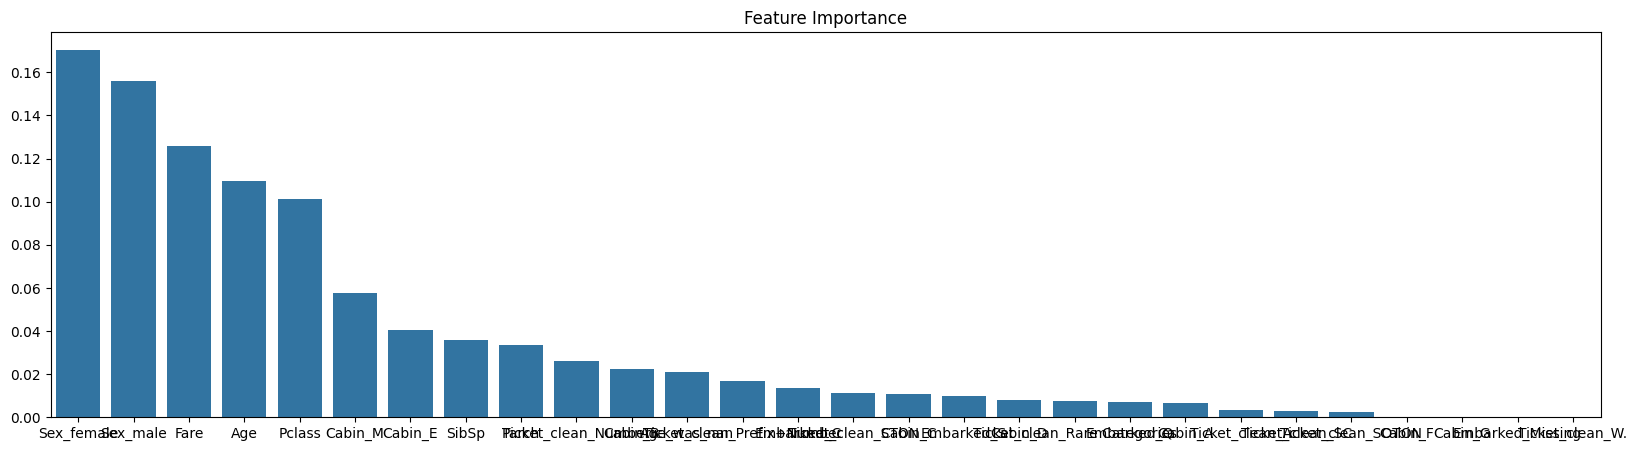

In [80]:
# Select the features
df_all_features = train_dataset_processed.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis = 1)
num_features = df_all_features.select_dtypes(['int64', 'float64']).columns.tolist()
cat_features = df_all_features.select_dtypes('object').columns.tolist()

X = df_all_features
y = train_dataset_processed['Survived']

# Train/Test split for all the features
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.2, random_state = 15, stratify = y)

# Initialize the preprocessors
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown = 'ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

X_train_transformed = preprocessor.fit_transform(X_train)

# Check the processor
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
all_feature_names = num_features + list(ohe_feature_names)
df_X_train_transformed = pd.DataFrame(X_train_transformed.toarray() if hasattr(X_train_transformed, "toarray") else X_train_transformed, 
                                      columns=all_feature_names)

# Initialize the Pipeline
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=15))
])

# Define hyperparameters
param_distributions = {
    'model__n_estimators': randint(100, 500),
    'model__max_depth': randint(3, 20),
    'model__min_samples_split': randint(2, 20),
    'model__min_samples_leaf': randint(1, 10),
    'model__max_features': ['sqrt', 'log2', None]
}

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(
    rfc,
    param_distributions = param_distributions,
    n_iter = 30,
    scoring = 'precision',
    cv = 5, 
    verbose = 2,
    random_state = 15,
    n_jobs = -1 # Run with all CPU cores
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters selection
print("Best parameters:", random_search.best_params_)
print("Best precision score:", random_search.best_score_)

# Evaluate on valiation set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_val)

# Generate the DF and export it
df_val_pred = pd.DataFrame({
    'y_val': y_val,
    'y_pred': y_pred
})
rfc_hyperparam_path = os.path.join(main_dir, 'data', 'processed', 'Advanced', 'rfc_hyperparam_auto_results.csv')
df_val_pred.to_csv(rfc_hyperparam_path, index = False)

# Feature Importance
rf = best_model.named_steps['model'] # Extract the best model from the Pipeline
feature_names = num_features + list(best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_features))
importances = pd.Series(rf.feature_importances_, index = feature_names).sort_values(ascending = False)

display(importances)

plt.figure(figsize = (20,5))
sns.barplot(importances)
plt.title('Feature Importance')



## Exclude features with low importance

In [81]:
# Select features with importance >= 1%
selected_features = importances[importances >= 0.01].index.tolist()

# Transform X_val as X_train
X_val_transformed = preprocessor.transform(X_val)  # folosim același preprocessor
df_X_val_transformed = pd.DataFrame(
    X_val_transformed.toarray() if hasattr(X_val_transformed, "toarray") else X_val_transformed,
    columns=df_X_train_transformed.columns
)

# Subset on selected features
X_train_selected = df_X_train_transformed[selected_features]
X_val_selected = df_X_val_transformed[selected_features]

# Target
y_train_selected = y_train
y_val_selected = y_val

# Fit model
rfc = RandomForestClassifier(random_state=15)
rfc.fit(X_train_selected, y_train_selected)

# Export the model
rfc_auto_select_path = os.path.join(main_dir, 'models', 'Advanced', 'rfc_auto_select.pkl')
joblib.dump(rfc, rfc_auto_select_path)

# Predict
y_selected_pred = rfc.predict(X_val_selected)

# DataFrame cu rezultate
df_rfc_auto_selected = pd.DataFrame({
    'y_val': y_val_selected,
    'y_pred': y_selected_pred
})

# Export the DataFrame
rfc_auto_selected_path = os.path.join(main_dir, 'data', 'processed', 'Advanced', 'df_rfc_auto_selected_results.csv')
df_rfc_auto_selected.to_csv(rfc_auto_selected_path, index = False)


In [85]:
test = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), 'data', 'raw', 'test.csv'))
rfc.predict(test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Cabin
- Embarked
- Name
- PassengerId
- Sex
- ...
Feature names seen at fit time, yet now missing:
- Age_was_nan
- Cabin_B
- Cabin_C
- Cabin_E
- Cabin_M
- ...
